# Convolutional Neural Networks

# Import libraries

In [137]:
import numpy as np
import pandas as pd
import os
import re
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import savetxt

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

In [139]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU,MaxPool2D,Softmax

# Load image set and assign labels

In [142]:
instrument_df = pd.read_csv('archive/instruments.csv')

image_paths = instrument_df['filepaths'].tolist()
labels = instrument_df['labels'].tolist()

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
labels_df = pd.DataFrame({'Encoded Labels': encoded_labels, 'Original Labels': labels})

labels_df = labels_df.drop_duplicates()

labels_df = labels_df.sort_values(by='Encoded Labels')

labels_df = labels_df.reset_index(drop=True)

print(labels_df)
nClasses = len(labels_df)
print(f"{nClasses} different classes")

    Encoded Labels Original Labels
0                0      Didgeridoo
1                1      Tambourine
2                2       Xylophone
3                3        acordian
4                4         alphorn
5                5        bagpipes
6                6           banjo
7                7      bongo drum
8                8          casaba
9                9       castanets
10              10        clarinet
11              11      clavichord
12              12      concertina
13              13           drums
14              14        dulcimer
15              15           flute
16              16           guiro
17              17          guitar
18              18       harmonica
19              19            harp
20              20         marakas
21              21         ocarina
22              22           piano
23              23       saxaphone
24              24           sitar
25              25      steel drum
26              26        trombone
27              27  

In [ ]:
instruments = [
    "Didgeridoo",
    "Tambourine",
    "Xylophone",
    "acordian",
    "alphorn",
    "bagpipes",
    "banjo",
    "bongo drum",
    "casaba",
    "castanets",
    "1clarinet",
    "clavichord",
    "concertina",
    "drums",
    "dulcimer",
    "flute",
    "guiro",
    "guitar",
    "harmonica",
    "harp",
    "marakas",
    "ocarina",
    "piano",
    "saxaphone",
    "sitar",
    "steel drum",
    "trombone",
    "trumpet",
    "tuba",
    "violin"
]

In [146]:
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0  # Normalize the pixel values
    return img

In [148]:
images = np.array([preprocess_image('archive/' + path) for path in image_paths])

In [149]:
train_indices = np.where(instrument_df['data set'] == 'train')[0]
test_indices = np.where(instrument_df['data set'] == 'test')[0]
val_indices = np.where(instrument_df['data set'] == 'valid')[0]

In [150]:
train_images = images[train_indices]
train_labels = encoded_labels[train_indices]

In [152]:
test_images = images[test_indices]
test_labels = encoded_labels[test_indices]

In [154]:
val_images = images[val_indices]
val_labels = encoded_labels[val_indices]

In [155]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(4793, 100, 100, 3)
(150, 100, 100, 3)
(150, 100, 100, 3)


3


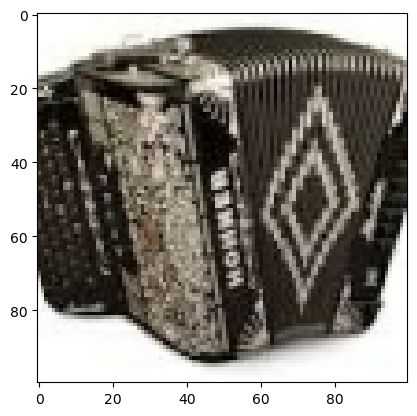

In [202]:
print(train_labels[5])
img = train_images[5]
plt.imshow(img)
plt.show()

13


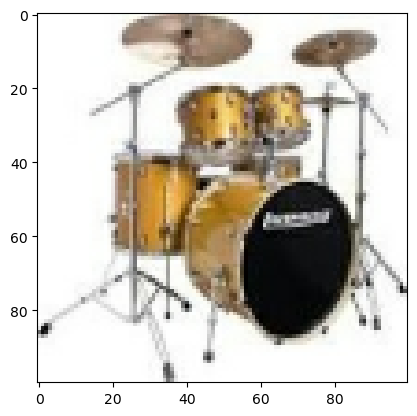

In [204]:
print(test_labels[55])
img = test_images[55]
plt.imshow(img)
plt.show()

3


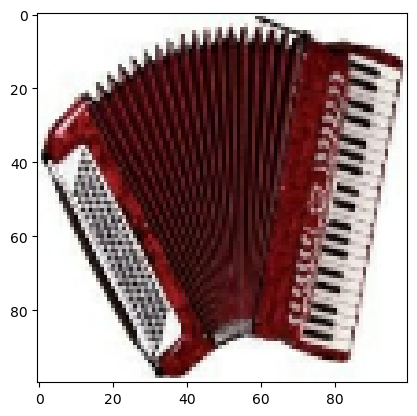

In [206]:
print(val_labels[1])
img = val_images[1]
plt.imshow(img)
plt.show()

# Creating the CNN model

In [ ]:
# Hyperparamter declaration
INIT_LR = 1e-3 
epochs = 30
batch_size = 64 

In [ ]:
# Neural network architecture
instruments_model = Sequential()
instruments_model.add(Input(shape=(100, 100, 3)))
instruments_model.add(Conv2D(32, kernel_size=3, padding='SAME', activation='relu'))
instruments_model.add(MaxPool2D((3, 3)))
instruments_model.add(Conv2D(64, kernel_size=3, padding='SAME', activation='relu'))
instruments_model.add(MaxPool2D((3, 3)))
instruments_model.add(Conv2D(128, kernel_size=3, padding='SAME', activation='relu'))
instruments_model.add(Flatten())

instruments_model.add(Dense(256, activation='relu'))
instruments_model.add(Dropout(0.5))
instruments_model.add(Dense(128, activation='relu'))
instruments_model.add(Dropout(0.5))
instruments_model.add(Dense(30, activation='softmax'))

In [181]:
instruments_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 33, 33, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 33, 33, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │       3,965,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,095,198 (15.62 MB)

 Trainable params: 4,095,198 (15.62 MB)

 Non-trainable params: 0 (0.00 B)

In [183]:
instruments_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=INIT_LR),metrics=['accuracy'])

# Training the model

In [186]:
train_Y_one_hot = to_categorical(train_labels, num_classes=30)
print(train_Y_one_hot.shape)
print(train_images.shape)
val_Y_one_hot = to_categorical(val_labels, num_classes=30)
print(val_Y_one_hot.shape)
print(val_images.shape)
test_Y_one_hot = to_categorical(test_labels, num_classes=30)
print(test_Y_one_hot.shape)
print(val_images.shape)

(4793, 30)
(4793, 100, 100, 3)
(150, 30)
(150, 100, 100, 3)
(150, 30)
(150, 100, 100, 3)


In [ ]:
instruments_train = instruments_model.fit(train_images[...,np.newaxis],
                    train_Y_one_hot,
                    validation_data= (val_images[...,np.newaxis],
                    val_Y_one_hot),
                    verbose=1,
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.0440 - loss: 3.4103 - val_accuracy: 0.0600 - val_loss: 3.3518
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.0773 - loss: 3.3135 - val_accuracy: 0.1067 - val_loss: 3.1257
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.1340 - loss: 3.1324 - val_accuracy: 0.2867 - val_loss: 2.5959
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.2005 - loss: 2.8667 - val_accuracy: 0.3733 - val_loss: 2.2852
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.2586 - loss: 2.6453 - val_accuracy: 0.5067 - val_loss: 1.9666
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.2994 - loss: 2.4916 - val_accuracy: 0.5733 - val_loss: 1.6680
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.3578 - loss: 2.2867 - val_accuracy: 0.5800 - val_loss: 1.5571
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.3892 - loss: 2.1340 - val_accuracy:

In [190]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
instruments_model.save("instruments_mnist.keras")

# Evaluation

In [193]:
test_eval = instruments_model.evaluate(test_images[...,np.newaxis], test_Y_one_hot, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8227 - loss: 0.8151


In [195]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.8308688402175903
Test accuracy: 0.8066666722297668


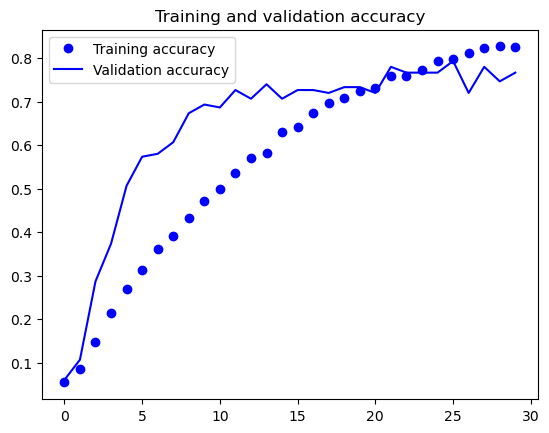

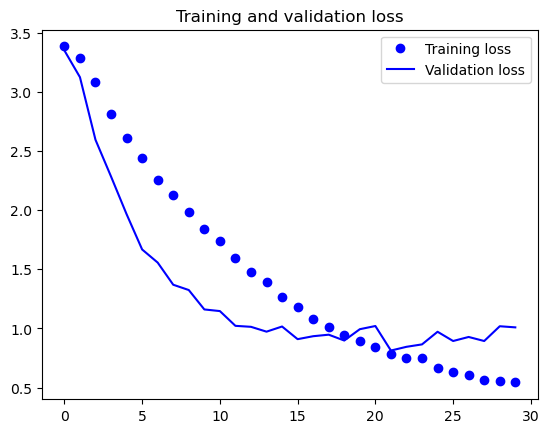

In [199]:
accuracy = instruments_train.history['accuracy']
val_accuracy = instruments_train.history['val_accuracy']
loss = instruments_train.history['loss']
val_loss = instruments_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [215]:
predicted_classes2 = instruments_model.predict(test_images)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [221]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_labels.shape
print(len(instruments))

1


# Mistakes

Found 29 incorrect labels


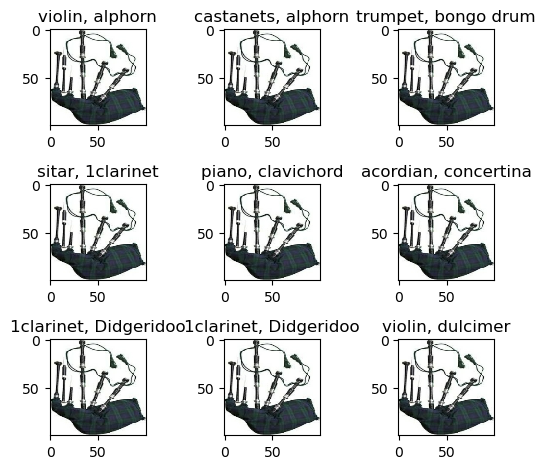

In [ ]:
incorrect = np.where(predicted_classes!=test_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[correct].reshape(100,100,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(instruments[predicted_classes[incorrect]],
                                                    instruments[test_labels[incorrect]]))
    plt.tight_layout()

In [313]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_labels, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.60      0.75         5
     Class 1       0.83      1.00      0.91         5
     Class 2       0.83      1.00      0.91         5
     Class 3       0.83      1.00      0.91         5
     Class 4       0.60      0.60      0.60         5
     Class 5       0.83      1.00      0.91         5
     Class 6       1.00      1.00      1.00         5
     Class 7       1.00      0.80      0.89         5
     Class 8       0.83      1.00      0.91         5
     Class 9       0.83      1.00      0.91         5
    Class 10       0.50      0.80      0.62         5
    Class 11       1.00      0.80      0.89         5
    Class 12       0.80      0.80      0.80         5
    Class 13       1.00      1.00      1.00         5
    Class 14       0.40      0.40      0.40         5
    Class 15       0.80      0.80      0.80         5
    Class 16       1.00      0.60      0.75         5
    Class 17       0.80    